In [179]:
# improt libraries 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler

In [2]:
#read dataset
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## **EDA**

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

In [176]:
df.duplicated().sum()

0

In [160]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [161]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


In [162]:
df.corr().style.background_gradient(cmap='coolwarm',vmin=-1,vmax=1).format(precision=1)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.0,0.1,-0.0,-0.4,-0.1,0.2,-0.1,0.1,-0.0,-0.0,0.0,-0.2,0.1,-0.1,-0.1,-0.2,0.0,-0.1,0.1,0.0,-0.1,0.0,0.1,0.1,-0.0,-0.2,-0.0,-0.0,-0.0,-0.0,-0.0
V1,0.1,1.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.2,-0.1
V2,-0.0,0.0,1.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.5,0.1
V3,-0.4,-0.0,0.0,1.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.2,-0.2
V4,-0.1,0.0,-0.0,0.0,1.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.1,0.1
V5,0.2,-0.0,0.0,-0.0,0.0,1.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.4,-0.1
V6,-0.1,0.0,-0.0,-0.0,-0.0,-0.0,1.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.2,-0.0
V7,0.1,-0.0,0.0,-0.0,0.0,-0.0,0.0,1.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.4,-0.2
V8,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,1.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.1,0.0
V9,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,1.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.1


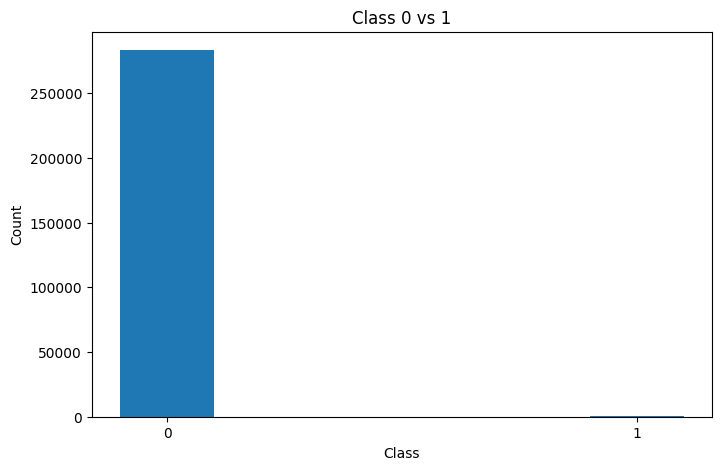

In [163]:
plt.figure(figsize=(8,5))
plt.bar(df['Class'].value_counts().index,df['Class'].value_counts().values, width=0.2)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title(f'Class {df["Class"].value_counts().index[0]} vs {df["Class"].value_counts().index[1]}')
plt.xticks(ticks=[0, 1], labels=['0', '1'])
plt.show()

In [164]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

**The Data is Highly `unbalanced`**

0 --> Normal Transaction

1 --> Fraud Transaction

In [165]:
# Sprate the data into Fraud and legit transactions

legit = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]
print(legit.shape,fraud.shape)

(283253, 31) (473, 31)


In [166]:
legit[['Amount']].describe()

,Amount
count,283253.000000
mean,88.413575
std,250.379023
min,0.000000
25%,5.670000
50%,22.000000
75%,77.460000
max,25691.160000


In [167]:
fraud[['Amount']].describe()

,Amount
count,473.000000
mean,123.871860
std,260.211041
min,0.000000
25%,1.000000
50%,9.820000
75%,105.890000
max,2125.870000


In [168]:
def get_histogram(data, col):

    sns.histplot(data[col], bins=50, kde=True)
    plt.title("Distribution of Transaction Amount")
    plt.show()


def get_boxplot(data, col):
    plt.figure(figsize=(10, 6))

    sns.boxplot(data=data[col], orient="h")
    plt.title("Boxplot for Outlier Detection")
    plt.show()

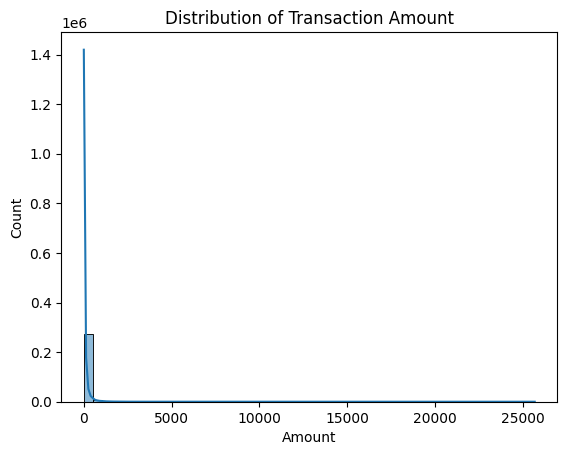

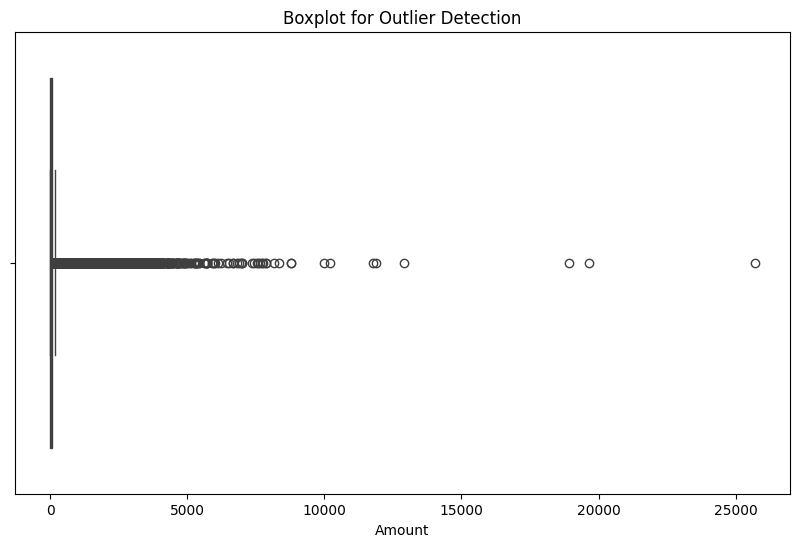

In [169]:
# Outlier detection for legit transactions
get_histogram(legit, 'Amount')
get_boxplot(legit, 'Amount')

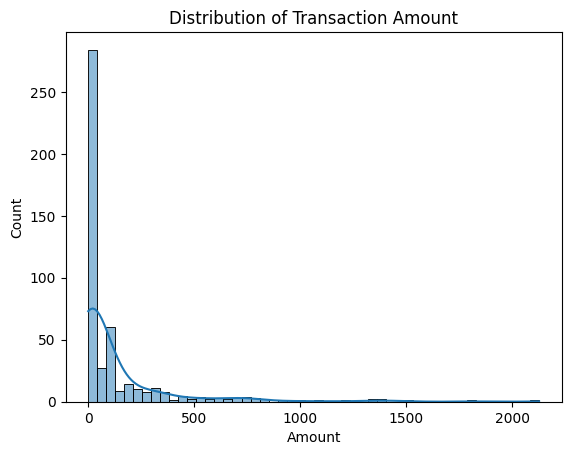

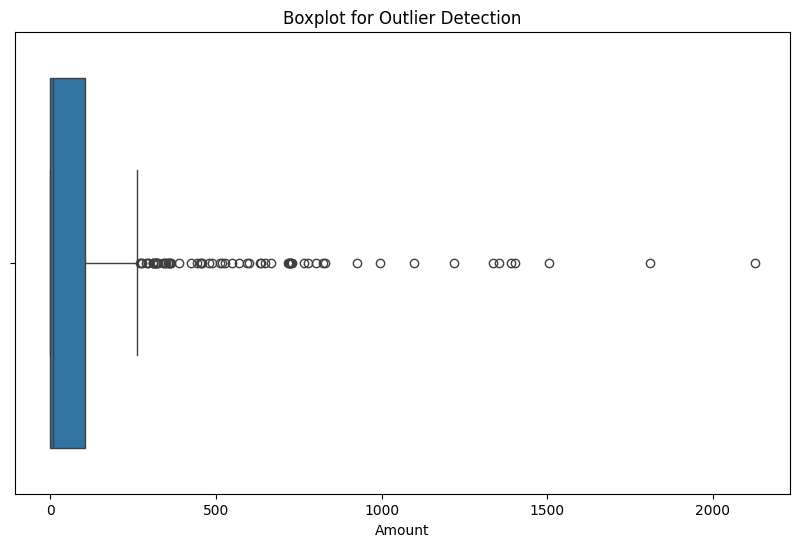

In [170]:
get_histogram(fraud, 'Amount')
get_boxplot(fraud, 'Amount')

In [171]:
df.groupby('Class').mean().T

Class,0,1
Time,94835.058093,80450.513742
V1,0.013439,-4.498280
V2,-0.009829,3.405965
V3,0.012853,-6.729599
V4,-0.010440,4.472591
V5,0.006769,-2.957197
V6,0.001251,-1.432518
V7,0.010447,-5.175912
V8,-0.002448,0.953255
V9,0.002613,-2.522124


In [172]:
def detect_outliers_zscore(df, threshold=3):
    outliers = []
    for col in df.select_dtypes(include=[np.number]):  # Only numeric columns
        z_scores = (df[col] - df[col].mean()) / df[col].std()
        outliers_in_col = df[np.abs(z_scores) > threshold]
        outliers.append(outliers_in_col)
    return pd.concat(outliers).drop_duplicates()

outliers = detect_outliers_zscore(df)
outliers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
164,103.0,-6.093248,-12.114213,-5.694973,3.294389,-1.413792,4.776000,4.808426,-0.228197,-0.525896,...,2.228823,-2.264037,-3.553381,1.215279,-0.406073,-0.653384,-0.711222,0.672900,3828.04,0
290,209.0,-5.852465,5.267376,-1.761895,-1.441250,-0.988529,-0.672187,0.075760,0.774198,3.580112,...,-0.910910,-1.204988,0.215766,-0.498066,1.125918,0.201450,2.468867,1.573084,8.97,0
1158,905.0,-6.169664,6.118940,-1.667775,-1.206991,-0.021373,-1.208458,2.184989,-1.512188,6.450992,...,-1.127086,0.261435,0.136166,0.413380,0.666632,-0.530568,2.464962,0.365892,0.89,0
1632,1264.0,-11.140706,-9.612726,-12.389545,6.013346,-32.092129,21.393069,34.303177,-7.520784,-1.925732,...,-4.709977,1.366110,-2.925888,0.843551,0.746267,0.801387,3.852046,4.157934,7712.43,0
2178,1698.0,-5.849226,-11.754975,-3.333303,3.673246,-4.459583,0.659098,4.527224,-0.985512,0.237794,...,2.160870,-1.992179,-3.240351,0.609619,-0.985548,0.089693,-0.713355,0.653060,3669.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254344,156685.0,-0.129778,0.141547,-0.894702,-0.457662,0.810608,-0.504723,1.373588,-0.209476,0.208494,...,-0.032643,-0.246526,0.484108,0.359637,-0.435972,-0.248480,0.021527,0.109192,187.11,1
254395,156710.0,0.202402,1.176270,0.346379,2.882138,1.407133,-0.504355,1.438537,-0.395603,-1.555142,...,0.242560,0.841230,-0.370157,-0.026012,0.491954,0.234576,-0.279788,-0.331933,7.59,1
263080,160791.0,2.132386,0.705608,-3.530759,0.514779,1.527175,-1.716268,1.132791,-0.574214,0.128904,...,0.163739,0.703910,-0.245076,0.460049,0.920281,-0.216586,-0.026219,-0.025001,1.00,1
276071,166883.0,2.091900,-0.757459,-1.192258,-0.755458,-0.620324,-0.322077,-1.082511,0.117200,-0.140927,...,0.288253,0.831939,0.142007,0.592615,-0.196143,-0.136676,0.020182,-0.015470,19.95,1


## **Under Sampling**

In [177]:
# Splitting the data into X and y
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
# Perform undersampling
undersampler = RandomUnderSampler(sampling_strategy=1.0, random_state=42)  # Set sampling_strategy=1.0 for equal classes

# Perform undersampling
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Check the new class distribution
print(y_resampled.value_counts())

Class
0    473
1    473
Name: count, dtype: int64


In [198]:
#Performing LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

print('\tLogisticRegression Evaluation\n')
print(confusion_matrix(y_test, y_pred_lr), '\n')
print('Train accuracy: ',accuracy_score(y_train, model_lr.predict(X_train)), '\n')
print('Test accuracy: ',accuracy_score(y_test, y_pred_lr), '\n')
print(classification_report(y_test, y_pred_lr))

	LogisticRegression Evaluation

[[94  1]
 [ 9 86]] 

Train accuracy:  0.9497354497354498 

Test accuracy:  0.9473684210526315 

              precision    recall  f1-score   support

           0       0.91      0.99      0.95        95
           1       0.99      0.91      0.95        95

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.95      0.95      0.95       190



c:\Users\hussi\.conda\envs\Note_Book\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [200]:
# performing Random Forest

model_rf = RandomForestClassifier(random_state=42, n_estimators=100) 
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

print('\tRandomForestClassifier Evaluation\n')
print(confusion_matrix(y_test, y_pred_rf), '\n')
print('Train accuracy: ',accuracy_score(y_train, model_rf.predict(X_train)), '\n')
print('Test accuracy: ',accuracy_score(y_test, y_pred_rf), '\n')
print(classification_report(y_test, y_pred_rf))

	RandomForestClassifier Evaluation

[[95  0]
 [10 85]] 

Train accuracy:  1.0 

Test accuracy:  0.9473684210526315 

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        95
           1       1.00      0.89      0.94        95

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.95      0.95      0.95       190



## **SMOTE**

In [202]:
#Performing SMOTE
smote = SMOTE(random_state=42, sampling_strategy=1)
X_smote, y_smote = smote.fit_resample(X, y)
print(y_smote.value_counts())

Class
0    283253
1    283253
Name: count, dtype: int64


In [205]:
#perform LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote)

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

print('\tLogisticRegression Evaluation\n')
print(confusion_matrix(y_test, y_pred_lr), '\n')
print('Train accuracy: ',accuracy_score(y_train, model_lr.predict(X_train)), '\n')
print('Test accuracy: ',accuracy_score(y_test, y_pred_lr), '\n')
print(classification_report(y_test, y_pred_lr))

c:\Users\hussi\.conda\envs\Note_Book\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


	LogisticRegression Evaluation

[[55679   972]
 [ 2162 54489]] 

Train accuracy:  0.9717897458980944 

Test accuracy:  0.9723394114843515 

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     56651
           1       0.98      0.96      0.97     56651

    accuracy                           0.97    113302
   macro avg       0.97      0.97      0.97    113302
weighted avg       0.97      0.97      0.97    113302



In [206]:
# performing Random Forest

model_rf = RandomForestClassifier(random_state= 42, n_estimators=100)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

print('\tRandomForestClassifier Evaluation\n') 
print(confusion_matrix(y_test, y_pred_rf), '\n')
print('Train accuracy: ',accuracy_score(y_train, model_rf.predict(X_train)), '\n')
print('Test accuracy: ',accuracy_score(y_test, y_pred_rf), '\n')
print(classification_report(y_test, y_pred_rf))

	RandomForestClassifier Evaluation

[[56643     8]
 [    0 56651]] 

Train accuracy:  1.0 

Test accuracy:  0.999929392243738 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       1.00      1.00      1.00     56651

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



## **Weighted Model**

In [ ]:
#weighted classes with SMOTE 0.5

smote = SMOTE(random_state=42, sampling_strategy=0.5)
X_smote, y_smote = smote.fit_resample(X, y)
print(y_smote.value_counts())


Class
0    283253
1    141626
Name: count, dtype: int64


In [210]:
#performing logistic regression with weighted classes

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote)

model_lr = LogisticRegression(class_weight='balanced')
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

print('\tLogisticRegression Evaluation\n')
print(confusion_matrix(y_test, y_pred_lr), '\n')
print('Train accuracy: ',accuracy_score(y_train, model_lr.predict(X_train)), '\n')
print('Test accuracy: ',accuracy_score(y_test, y_pred_lr), '\n')
print(classification_report(y_test, y_pred_lr))

	LogisticRegression Evaluation

[[55593  1058]
 [ 1048 27277]] 

Train accuracy:  0.973833711382365 

Test accuracy:  0.9752165317266052 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     56651
           1       0.96      0.96      0.96     28325

    accuracy                           0.98     84976
   macro avg       0.97      0.97      0.97     84976
weighted avg       0.98      0.98      0.98     84976



c:\Users\hussi\.conda\envs\Note_Book\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [213]:
#performing Random Forest with weighted classes

#without SMOTE 
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#with SMOTE on 0.5
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote)

model_rf = RandomForestClassifier(random_state= 42, n_estimators=100, class_weight='balanced')
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

print('\tRandomForestClassifier Evaluation\n')
print(confusion_matrix(y_test, y_pred_rf), '\n')
print('Train accuracy: ',accuracy_score(y_train, model_rf.predict(X_train)), '\n')
print('Test accuracy: ',accuracy_score(y_test, y_pred_rf), '\n')
print(classification_report(y_test, y_pred_rf))

	RandomForestClassifier Evaluation

[[56641    10]
 [    1 28324]] 

Train accuracy:  1.0 

Test accuracy:  0.9998705516851817 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       1.00      1.00      1.00     28325

    accuracy                           1.00     84976
   macro avg       1.00      1.00      1.00     84976
weighted avg       1.00      1.00      1.00     84976



## 